## Point Estimates

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

Population mean vs sample mean

Generate a population of random age data and draw a sample

In [50]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate([population_ages1, population_ages2])

population_ages.mean()

43.002372

The above creates a bi-modal population, with 100,000 at a mean age

In [55]:


np.random.seed(6)
sample_ages = np.random.choice(a= population_ages,
                               size=500)            # Sample 1000 values

print ( sample_ages.mean() )                         # Show sample mean

population_ages.mean() - sample_ages.mean()   # Check difference between means



42.388


0.614372000000003

.6 years difference from actual population average

## Point estimate for multiple categories

In [52]:
random.seed(10)
population_races = (["white"]*100000) + (["black"]*50000) + \
                    (["hispanic"]*50000) + (["asian"]*25000) + \
                        (["other"]*25000)
                        
demo_sample = random.sample(population_races, 1000)

for race in set(demo_sample):
    print(race + "proporion estimate:")
    print(demo_sample.count(race)/1000)

blackproporion estimate:
0.231
otherproporion estimate:
0.099
asianproporion estimate:
0.099
hispanicproporion estimate:
0.192
whiteproporion estimate:
0.379


## Central Limit Theorem

-0.12008483603917186


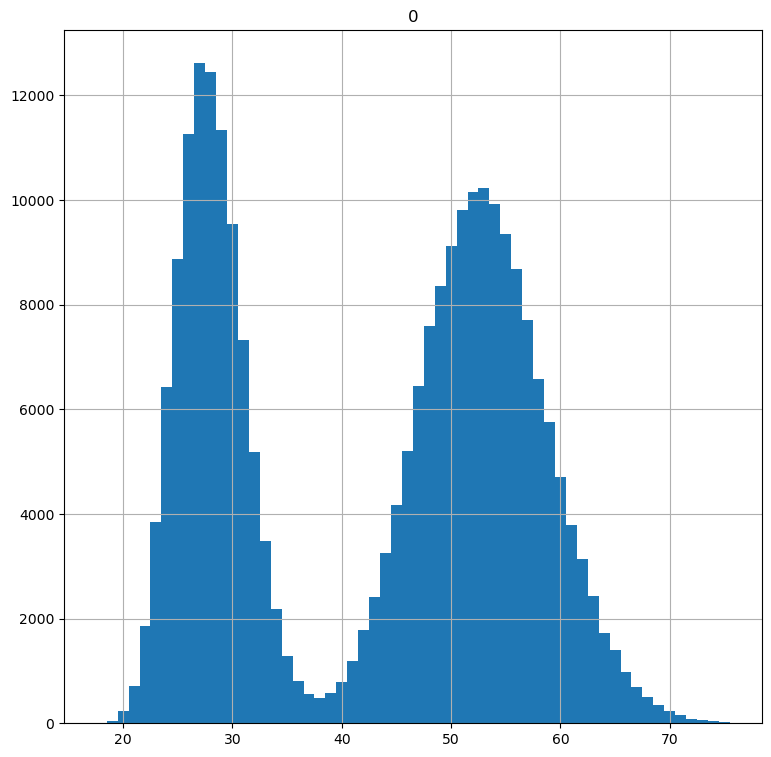

In [53]:
pd.DataFrame(population_ages).hist(bins=58,
                                   range=(17.5,75.5),
                                   figsize=(9,9))
print(stats.skew(population_ages));

Low skewness but bi-modal distribution

-0.056225282585406065


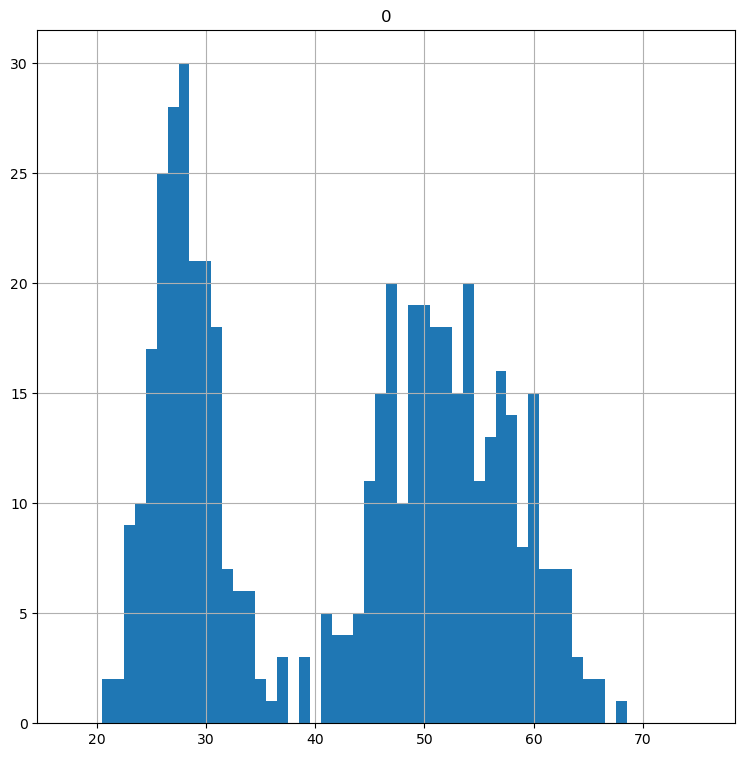

In [54]:
pd.DataFrame(sample_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9));

print( stats.skew(sample_ages) )



-0.056225282585406065


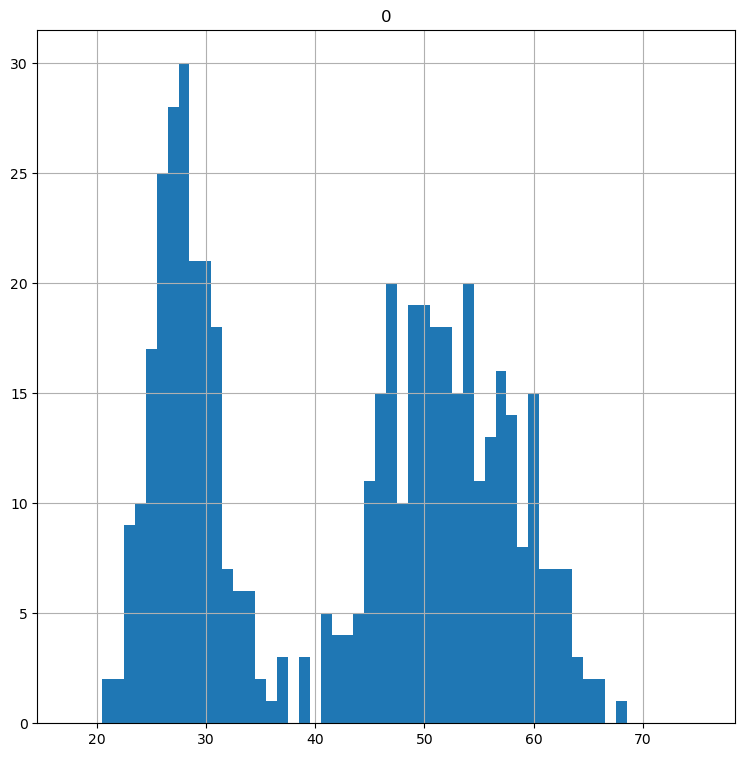

In [56]:
pd.DataFrame(sample_ages).hist(bins=58,
                               range=(17.5,75.5),
                               figsize=(9,9));
print(stats.skew(sample_ages))

The sample has a shape similar to the underlying distribution, suggesting that we cannot treat it as normal. But the CLT allows us to do so by taking many samples.

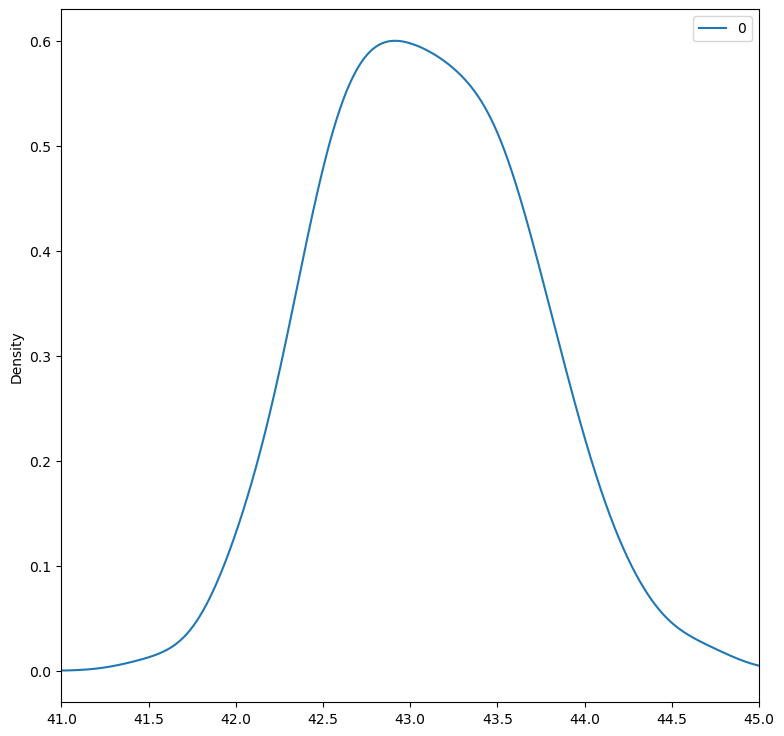

In [57]:
np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(41,45));  



In [58]:
population_ages.mean() - np.array(point_estimates).mean()

-0.08440799999999626

## Confidence Intervals

Let's calculate a 95% confidence for our mean point estimate:

If you know the standard deviation of the population, the margin of error is equal to:

$$z*\frac{\sigma}{\sqrt{n}}$$

In [74]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a=population_ages, size=sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)

print(f'{z_critical=}')

z_critical=1.959963984540054


Since our sample has two tails, $q=0.975$ is used rather than $q=0.95$, otherwise the z value will be too low. 

In [78]:
pop_stdev = population_ages.std()

margin_of_error = z_critical * pop_stdev / math.sqrt(sample_size)

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f'{z_critical=}')
print(f'{confidence_interval=}')
print(f'{population_ages.mean()=}')

z_critical=1.959963984540054
confidence_interval=(41.70306406882683, 43.34293593117317)
population_ages.mean()=43.002372


Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean:

In [82]:
np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)



In [85]:
intervals

[(42.43806406882683, 44.07793593117317),
 (42.35506406882683, 43.99493593117317),
 (42.69006406882683, 44.32993593117317),
 (42.12106406882683, 43.76093593117317),
 (41.84106406882683, 43.48093593117317),
 (42.73906406882683, 44.37893593117317),
 (42.13806406882683, 43.77793593117317),
 (41.75606406882683, 43.39593593117317),
 (41.52606406882683, 43.165935931173166),
 (42.54006406882683, 44.17993593117317),
 (42.57506406882683, 44.21493593117317),
 (42.49306406882683, 44.13293593117317),
 (41.73106406882683, 43.37093593117317),
 (42.33606406882683, 43.97593593117317),
 (42.64306406882683, 44.28293593117317),
 (42.13506406882683, 43.77493593117317),
 (41.79906406882683, 43.43893593117317),
 (42.23006406882683, 43.86993593117317),
 (42.25006406882683, 43.88993593117317),
 (42.09106406882683, 43.73093593117317),
 (41.69406406882683, 43.33393593117317),
 (42.09006406882683, 43.729935931173166),
 (43.40106406882683, 45.040935931173166),
 (41.96106406882683, 43.60093593117317),
 (42.43006406

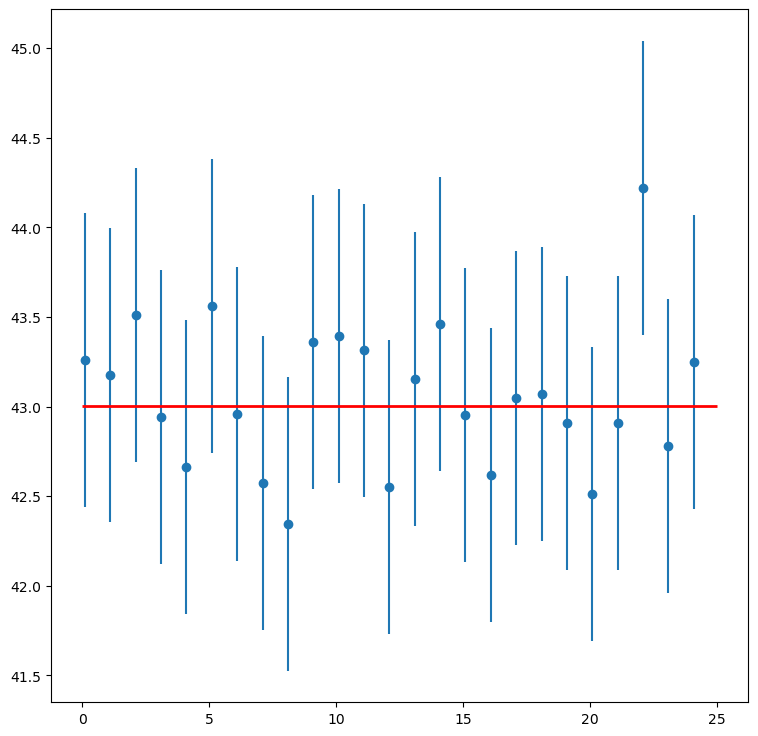

In [87]:


plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
            #  yerr=[abs(top-bot)/2 for top,bot in intervals],
             yerr=[(bot-top)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red");



All but one sample captures the true mean.

## T-Critical Value

Like the z-value, but used when the standard deviation of the population is not known.

The t-critical value is drawn from what's known as a t-distribution--a distribution that closely resembles the normal distribution but that gets wider and wider as the sample size falls. As before, 0.975 is used to achieve 95% confidence interval

`stats.t.ppf()`

In [90]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a=population_ages, size=sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24) # Degrees of freedom 1 less than sample size

print(f'{t_critical=}')

sample_stdev = sample.std(ddof=1)           # The missing df?

sigma = sample_stdev/math.sqrt(sample_size)
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print(f'{confidence_interval=}')
print(f'{sample_mean=}')
print(f'{population_ages.mean()=}')

t_critical=2.0638985616280205
confidence_interval=(37.65147508161371, 48.108524918386294)
sample_mean=42.88
population_ages.mean()=43.002372


In [91]:
sample.std()

12.410705056522776

In [92]:
sample.std(ddof=1)

12.666622806941609

In [93]:
# Check the difference between critical values with a sample size of 1000
             
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)  

0.0023774765933946007

**`stats.t.interval()`**

In [100]:
stats.t.interval(0.95,
                 df=24,
                 loc=sample_mean,
                 scale=sigma)

(37.65147508161371, 48.108524918386294)

We can also make a confidence interval for a point estimate of a population proportion. In this case, the margin of error equals:

$$z∗\sqrt{\frac{p(1−p)}{n}}$$

Where z is the z-critical value for our confidence level, p is the point estimate of the population proportion and n is the sample size. Let's calculate a 95% confidence interval for Hispanics according to the sample proportion we calculated earlier (0.192):

In [101]:
z_critical = stats.norm.ppf(0.975)
p = 0.192
n = 1000

margin_of_error = z_critical * math.sqrt(p*(1-p)/n)

confidence_interval = (p - margin_of_error, p + margin_of_error)
confidence_interval

(0.16758794241348748, 0.21641205758651252)

The output shows that the confidence interval captured the true population parameter of 0.2. Similar to our population mean point estimates, we can use the scipy stats.distribution.interval() function to calculate a confidence interval for a population proportion for us. In this case were working with z-critical values so we want to work with the normal distribution instead of the t distribution:


In [102]:
stats.norm.interval(0.95, loc=0.192, scale=math.sqrt(p*(1-p)/n))

(0.16758794241348748, 0.21641205758651252)